<a href="https://colab.research.google.com/github/MohabASHRAF-byte/income-predication/blob/main/Mohab_of_income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
# this line to fix output without need to run cells again
%matplotlib inline

In [294]:
data = pd.read_csv("train_data.csv")

data_test = pd.read_csv("test_data.csv")


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [255]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [256]:
for col in data.columns :
  print(col , data[col].unique(), '\n')
  

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt [ 77516  83311 215646 ...  34066  84661 257302] 

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing'

In [257]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [258]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [259]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin([' ?']).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


native-country
583
1.79%




In [260]:
data = data[data != ' ?'].dropna()
data = data.reset_index(drop=True)

In [261]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin([' ?']).sum()
    print(num_non)
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  Income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [263]:
# remove all white spaces in values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [264]:
for col in data.columns :
  print(col , data[col].unique(), '\n')

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86] 

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 

fnlwgt [ 77516  83311 215646 ...  84661 257302 201490] 

education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 

education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2] 

marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Fo

In [265]:
print(data.isnull().sum()) ;

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64


In [266]:
sum(data.duplicated())

23

In [267]:
data = data.drop_duplicates() ;

In [268]:
sum(data.duplicated())

0

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  Income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [270]:
data['marital-status'] = data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married')
data['marital-status'] = data['marital-status'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Not Married')
data['workclass'] = data['workclass'].replace(['State-gov', 'Local-gov', 'Federal-gov'], 'Gov')
data['workclass'] = data['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Non-Gov')
data['workclass'] = data['workclass'].replace(['Without-pay', 'Never-worked'], 'No salary')
data['relationship']=data['relationship'].replace(['Husband', 'Wife'], 'Spouse')

<ipython-input-270-77f411e08b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status'] = data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married')
<ipython-input-270-77f411e08b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status'] = data['marital-status'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Not Married')
<ipython-input-270-77f411e08b6d>:3: SettingWithCopyWarning: 
A value is trying to be se

In [271]:
le  = LabelEncoder()

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  Income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [273]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [274]:
data['Income '].unique()

array([0, 1])

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  Income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [276]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,30139.000000,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.714921,1.897950e+05,10.333057,10.122532,0.520555,5.960317,2.131657,3.678523,0.675736,1092.841202,88.439928,40.934703,36.384784,0.249046
std,13.131426,0.698885,1.056586e+05,3.812057,2.548738,0.499586,4.030067,1.386414,0.834786,0.468107,7409.110596,404.445239,11.978753,6.102941,0.432468
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176275e+05,9.000000,9.000000,0.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784170e+05,11.000000,10.000000,1.000000,6.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376045e+05,12.000000,13.000000,1.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,2.000000,1.484705e+06,15.000000,16.000000,1.000000,13.000000,4.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


<Axes: xlabel='age'>

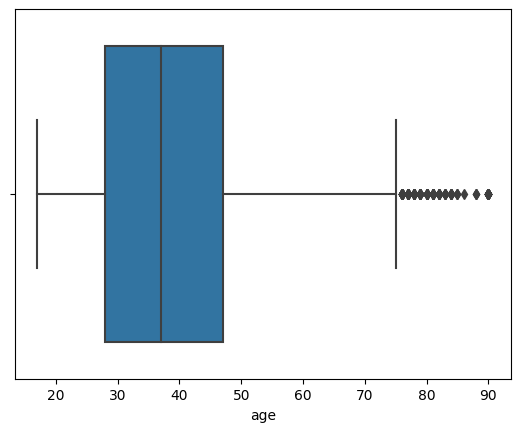

In [277]:
sns.boxplot(x=data['age'])

In [278]:
# for col in data.columns :
#   if col != 'Income ' :
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # calculate the upper and lower bounds for outliers
#     upper_bound = Q3 + 1.5 * IQR
#     lower_bound = Q1 - 1.5 * IQR

#     # Replace outliers with the maximum or minimum value of the IQR
#     data[col].loc[data[col] > upper_bound] = upper_bound
#     data[col].loc[data[col] < lower_bound] = lower_bound
#     sns.boxplot(x=data[col])

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,0,77516,9,13,1,0,0,4,1,2174,0,40,38,0
1,50,2,83311,9,13,0,3,3,4,1,0,0,13,38,0
2,38,2,215646,11,9,1,5,0,4,1,0,0,40,38,0
3,53,2,234721,1,7,0,5,3,2,1,0,0,40,38,0
4,28,2,338409,9,13,0,9,3,2,0,0,0,40,4,0


In [279]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'native-country', 'Income ','sex']
for col in data.columns:
    if col in category_col:
      continue;
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( data[col] < lower) | (data[col] > upper) )
    index_label = data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    # data.drop(index_label, inplace=True)

Number of outliers in age: 168
Number of outliers in fnlwgt: 904
Number of outliers in education-num: 193
Number of outliers in capital-gain: 2538
Number of outliers in capital-loss: 1427
Number of outliers in hours-per-week: 7947


<Axes: xlabel='age'>

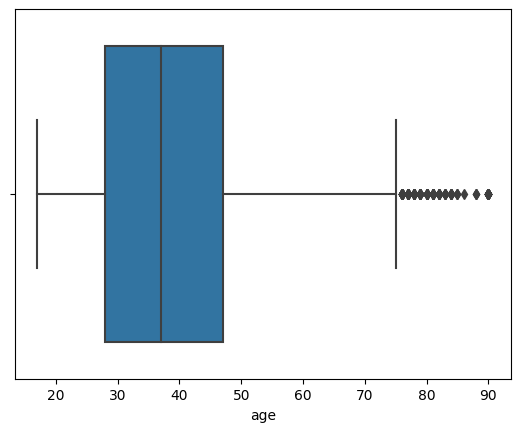

In [280]:
sns.boxplot(x=data['age'])

<Axes: xlabel='hours-per-week'>

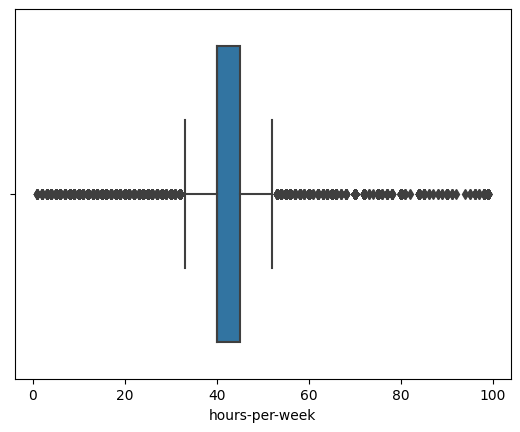

In [281]:
sns.boxplot(x=data['hours-per-week'])

In [282]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,0,77516,9,13,1,0,0,4,1,2174,0,40,38,0
1,50,2,83311,9,13,0,3,3,4,1,0,0,13,38,0
2,38,2,215646,11,9,1,5,0,4,1,0,0,40,38,0
3,53,2,234721,1,7,0,5,3,2,1,0,0,40,38,0
4,28,2,338409,9,13,0,9,3,2,0,0,0,40,4,0


In [283]:
data['Income '].unique()


array([0, 1])

In [284]:
from scipy.stats import pointbiserialr, spearmanr
param=[]
correlation=[]
abs_corr=[]

for c in data.columns:
    #Check if binary or continuous
    if c != 'Income ' :
        if len(data[c].unique()) <= 2:
            corr = spearmanr(data['Income '],data[c])[0]
        else:
            corr = pointbiserialr(data['Income '],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
marital-status,-0.436044,0.436044
education-num,0.335413,0.335413
age,0.242017,0.242017
hours-per-week,0.229435,0.229435
relationship,0.228431,0.228431
capital-gain,0.221204,0.221204
sex,0.216668,0.216668
capital-loss,0.150026,0.150026
education,0.079039,0.079039


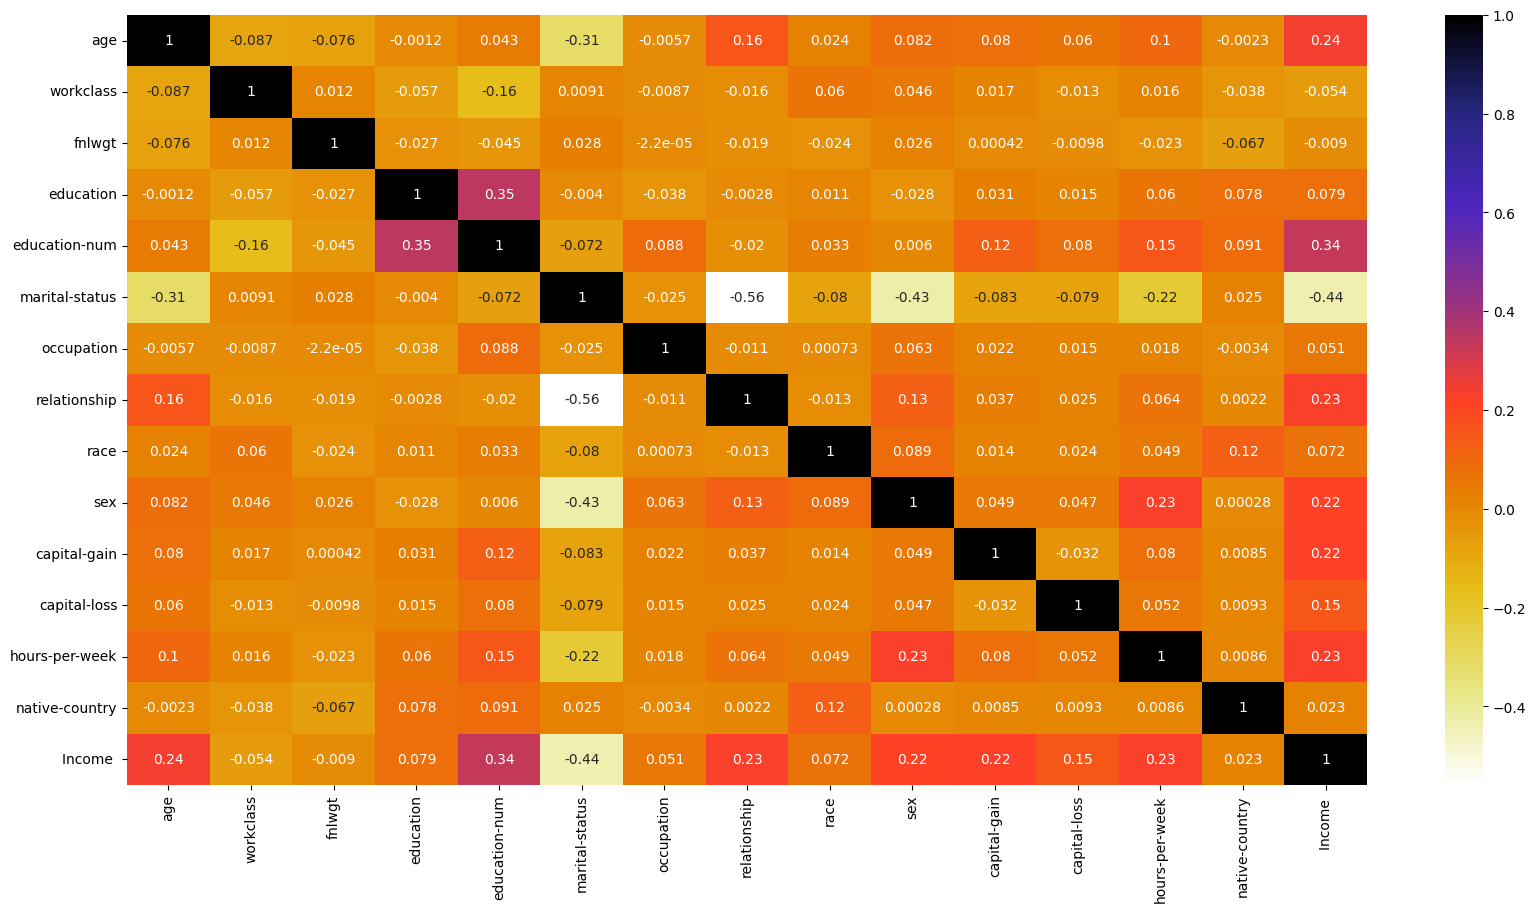

In [285]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int64
 14  Income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [287]:
Y_Train = data['Income ']

In [288]:
dropedItems =["education","fnlwgt","workclass","native-country","race","occupation","capital-loss"]
for item in dropedItems:
    data.drop(item, axis=1, inplace=True)

data.head()

In [289]:
data.head()

,age,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,Income
0,39,13,1,0,1,2174,40,0
1,50,13,0,3,1,0,13,0
2,38,9,1,0,1,0,40,0
3,53,7,0,3,1,0,40,0
4,28,13,0,3,0,0,40,0


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30161
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   education-num   30139 non-null  int64
 2   marital-status  30139 non-null  int64
 3   relationship    30139 non-null  int64
 4   sex             30139 non-null  int64
 5   capital-gain    30139 non-null  int64
 6   hours-per-week  30139 non-null  int64
 7   Income          30139 non-null  int64
dtypes: int64(8)
memory usage: 2.1 MB


In [291]:
scaler = MinMaxScaler()
# normalization
NormalizedData =["age","capital-gain","hours-per-week"]
for i in NormalizedData:
    data[i] = scaler.fit_transform(data[[i]])


In [292]:
data.head(10)

,age,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,Income
0,0.301370,13,1,0,1,0.021740,0.397959,0
1,0.452055,13,0,3,1,0.000000,0.122449,0
2,0.287671,9,1,0,1,0.000000,0.397959,0
3,0.493151,7,0,3,1,0.000000,0.397959,0
4,0.150685,13,0,3,0,0.000000,0.397959,0
5,0.273973,14,0,3,0,0.000000,0.397959,0
6,0.438356,5,0,0,0,0.000000,0.153061,0
7,0.479452,9,0,3,1,0.000000,0.448980,1
8,0.191781,14,1,0,0,0.140841,0.500000,1
9,0.342466,13,0,3,1,0.051781,0.397959,1


In [293]:


X_train = data.drop('Income ', axis=1)
y_train = data['Income ']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 451)

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Number of samples in each class:", np.bincount(y_resampled))

Number of samples in each class: [22633 22633]
